In [214]:
#Program to construct a decision tree based on the idea of splitting by Information Gain
#Group Members: Sandra Elizabeth Rajoo USC ID: 5477

In [ ]:
import pandas as pd
import numpy as np

In [215]:
df = pd.read_csv("dt_data.txt")
df['Occupied'].replace(['High', 'Moderate', 'Low'], [0,1,2], inplace=True)
df['Price'].replace(['Expensive', 'Normal', 'Cheap'], [0,1,2], inplace=True)
df['Music'].replace(['Loud', 'Quiet'], [0,1], inplace=True)
df['Location'].replace(['Talpiot', 'City-Center', 'Mahane-Yehuda', 'Ein-Karem', 'German-Colony'], [0,1,2,3,4], inplace=True)
df['VIP'].replace(['Yes', 'No'], [0,1], inplace=True)
df['Favorite Beer'].replace(['Yes', 'No'], [0,1], inplace=True)
df['Enjoy'].replace(['Yes', 'No'], [0,1], inplace=True)
df

,Occupied,Price,Music,Location,VIP,Favorite Beer,Enjoy
0,0,0,0,0,1,1,1
1,0,0,0,1,0,1,0
2,1,1,1,1,1,0,0
3,1,0,1,4,1,1,1
4,1,0,1,4,0,0,0
5,1,1,1,3,1,1,0
6,2,1,1,3,1,1,1
7,1,2,0,2,1,1,0
8,0,0,0,1,0,0,0
9,2,2,1,1,1,1,1


In [216]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        ''' constructor ''' 
        
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain
        
        # for leaf node
        self.value = value

In [217]:
class DecisionTreeClassifier():
    def __init__(self, min_samples_split=2, max_depth=2):
        ''' constructor '''
        
        # initialize the root of the tree 
        self.root = None
        
        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree ''' 
        
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["info_gain"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["info_gain"])
        
        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''
        
        # dictionary to store the best split
        best_split = {}
        max_info_gain = -float("inf")
        
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_info_gain = self.information_gain(y, left_y, right_y)
                    # update the best split if needed
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain
                        
        # return best split
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def information_gain(self, parent, l_child, r_child):
        ''' function to compute information gain '''
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain
    
    def entropy(self, y):
        ''' function to compute entropy '''
        
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy
        
    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''
        
        Y = list(Y)
        return max(Y, key=Y.count)
    
    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    
    def fit(self, X, Y):
        ''' function to train the tree '''
        
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
    
    def predict(self, X):
        ''' function to predict new dataset '''
        
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions
    
    def make_prediction(self, x, tree):
        ''' function to predict a single data point '''
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

In [218]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=41)

In [219]:
classifier = DecisionTreeClassifier(min_samples_split=3, max_depth=5)
classifier.fit(X_train,Y_train)
classifier.print_tree()

X_3 <= 0 ? 0.16715678748009255
 left:1
 right:X_5 <= 0 ? 0.32365019815155627
  left:0
  right:X_3 <= 3 ? 0.2247875095893599
    left:X_0 <= 1 ? 0.5216406363433185
        left:0
        right:X_3 <= 1 ? 0.31127812445913283
                left:1
                right:1
    right:1


In [220]:
#Testing the model
Y_pred = classifier.predict(X_test) 
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.8

In [221]:
#Making a prediction
test = ([[1,2,0,1,1,1]])
if(classifier.predict(test)[0]):
    print("No")
else:
    print("Yes")

Yes


In [ ]:
#Library Function Implementation of Decision Tree

In [222]:
import matplotlib.pyplot as pl
%matplotlib inline
from sklearn.preprocessing import LabelEncoder#for train test splitting
from sklearn.model_selection import train_test_split#for decision tree object
from sklearn.tree import DecisionTreeClassifier#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree 
from sklearn.tree import plot_tree

In [223]:
df_new = pd.read_csv("dt_data.txt")

In [224]:
target = df_new['Enjoy']
df1 = df.copy()
df1 = df1.drop('Enjoy', axis =1)

In [225]:
# Defining the attributes
X = df1

In [226]:
#label encoding
le = LabelEncoder()
target = le.fit_transform(target)
target

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1])

In [227]:
y = target

In [228]:
# Splitting the data - 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (17, 6)
Testing split input-  (5, 6)


In [229]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [230]:
# Predicting the values of test data
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.75      1.00      0.86         3

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5



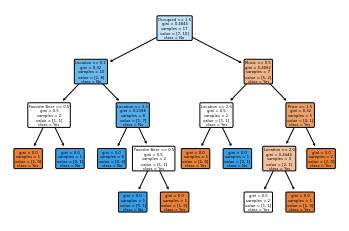

In [231]:
dec_tree = plot_tree(decision_tree=dtree, feature_names = df1.columns, 
                     class_names =["Yes", "No"] , filled = True , precision = 4, rounded = True)

In [232]:
#Making a prediction
if(dtree.predict(test)[0]):
    print("No")
else:
    print("Yes")

No
